# **IMPORTING** **LIBRARIES**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **DATASET** **IMPORTATION**

In [3]:
! mkdir -p ~/.kaggle

In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
! cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 /root/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c playground-series-s4e2

  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 17.2MB/s]


In [8]:
! unzip /content/playground-series-s4e2.zip

Archive:  /content/playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
obesity = pd.read_csv("train.csv")
obesity.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# **DATA** **PREPROCESSING**

In [10]:
obesity = obesity.drop('id', axis=1)

In [11]:
obesity.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [12]:
obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [13]:
obesity = obesity.replace({'no': 0, 'yes': 1})

In [14]:
obesity = pd.get_dummies(obesity, columns=['CALC', 'MTRANS', 'CAEC'], drop_first=True, dtype=int)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
obesity['NObeyesdad'] = le.fit_transform(obesity['NObeyesdad'])

In [17]:
obesity = obesity.replace({'Female': 0, 'Male': 1})

In [18]:
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,NObeyesdad,CALC_Frequently,CALC_Sometimes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Always,CAEC_Frequently,CAEC_Sometimes
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,...,6,0,1,0,0,1,0,0,0,1
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,2.000000,...,1,0,0,0,0,0,0,0,1,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,...,0,0,0,0,0,1,0,0,0,1
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,...,4,0,1,0,0,1,0,0,0,1
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,...,6,0,1,0,0,1,0,0,0,1


In [19]:
x = obesity.drop('NObeyesdad', axis=1)
y = obesity['NObeyesdad']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=420)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train.shape, x_test.shape,

((14530, 22), (6228, 22))

In [25]:
x_train = x_train.reshape(-1, 22, 1)
x_test = x_test.reshape(-1, 22, 1)

In [26]:
y_train = y_train.to_numpy()
y_test = np.array(y_test)

# **MACHINE** **BUILDING**

In [54]:
model = tf.keras.models.Sequential()

In [55]:
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(22, 1)))

In [56]:
model.add(tf.keras.layers.BatchNormalization())

In [57]:
model.add(tf.keras.layers.Dropout(0.2))

In [58]:
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

In [59]:
model.add(tf.keras.layers.BatchNormalization())

In [60]:
model.add(tf.keras.layers.Dropout(0.25))

In [61]:
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=2, padding='same', activation='relu'))

In [62]:
model.add(tf.keras.layers.BatchNormalization())

In [63]:
model.add(tf.keras.layers.Dropout(0.2))

In [64]:
model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=2, padding='same', activation='relu'))

In [65]:
model.add(tf.keras.layers.BatchNormalization())

In [66]:
model.add(tf.keras.layers.Dropout(0.2))

In [67]:
model.add(tf.keras.layers.Flatten())

In [68]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [69]:
model.add(tf.keras.layers.Dense(units=7, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 22, 32)            96        
                                                                 
 batch_normalization_4 (Bat  (None, 22, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 22, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            4160      
                                                                 
 batch_normalization_5 (Bat  (None, 22, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 22, 64)           

# **MACHINE** **TRAINING**

In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=0.000050)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [72]:
epoch = 19
history = model.fit(x_train, y_train, batch_size=25, epochs=epoch, validation_data=(x_test, y_test))

Epoch 1/19
582/582 [==============================] - 23s 34ms/step - loss: 1.0794 - sparse_categorical_accuracy: 0.6048 - val_loss: 0.6232 - val_sparse_categorical_accuracy: 0.7662
Epoch 2/19
582/582 [==============================] - 20s 34ms/step - loss: 0.6903 - sparse_categorical_accuracy: 0.7352 - val_loss: 0.5123 - val_sparse_categorical_accuracy: 0.8056
Epoch 3/19
582/582 [==============================] - 20s 34ms/step - loss: 0.5885 - sparse_categorical_accuracy: 0.7725 - val_loss: 0.4840 - val_sparse_categorical_accuracy: 0.8211
Epoch 4/19
582/582 [==============================] - 19s 33ms/step - loss: 0.5389 - sparse_categorical_accuracy: 0.7919 - val_loss: 0.4336 - val_sparse_categorical_accuracy: 0.8426
Epoch 5/19
582/582 [==============================] - 20s 34ms/step - loss: 0.5009 - sparse_categorical_accuracy: 0.8098 - val_loss: 0.4327 - val_sparse_categorical_accuracy: 0.8410
Epoch 6/19
582/582 [==============================] - 20s 34ms/step - loss: 0.4891 - spars

# **MACHINE** **EVALUATION**

In [73]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

195/195 [==============================] - 2s 7ms/step


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
a_s = accuracy_score(y_pred, y_test)

In [76]:
print(f"Accuracy Score: {a_s * 100:.2f}")

Accuracy Score: 87.01


In [77]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

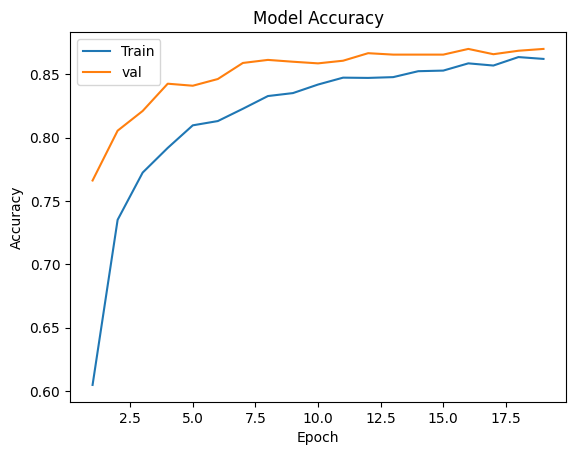

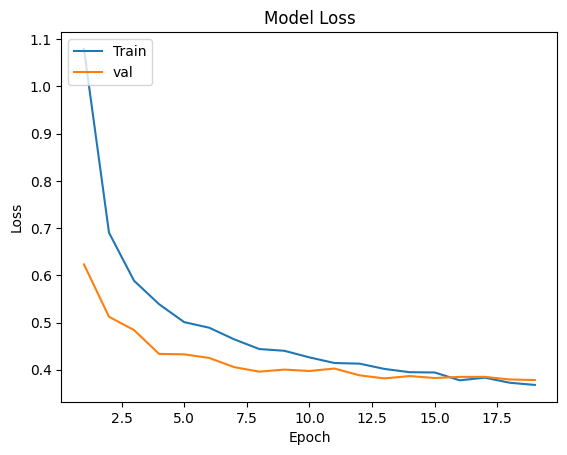

In [78]:
learning_curve(history, epoch)

In [79]:
data = {"real values" : y_test, "predicted values" : y_pred}
comparism = pd.DataFrame(data)
comparism.head(10)

,real values,predicted values
0,5,1
1,1,1
2,6,6
3,3,3
4,5,5
5,4,4
6,1,1
7,2,5
8,4,4
9,4,4
